In [1]:
%matplotlib inline
from analysistools import *

# Feature Importance
We'll start by looking at classifiers trained with the full list of features.


In [2]:
features = make_feature_list()
base_path = "/swot2/features/MODEL_RUNS/00_ALL_FEATURES/train-test-split"
models = get_models(base_path)

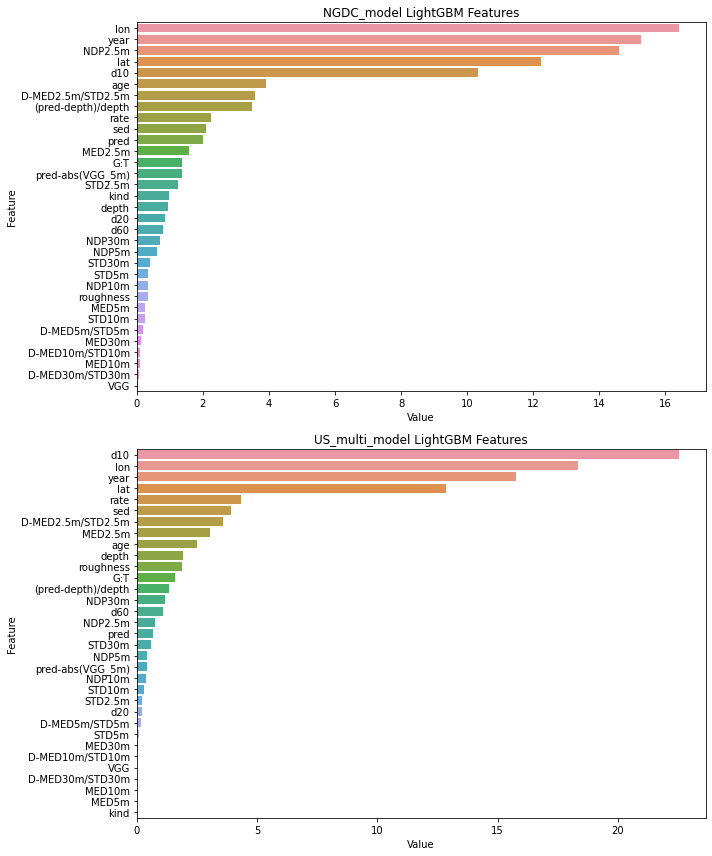

In [5]:
plot_ftr_importance(models,features)


## Remove features
We see that some of the most important features between the two models are lon, lat, and year. Those features might be biasing our model. What happens when we remove them?

In [5]:
features = remove_feature_from_list(features,['lon','lat','year'])
base_path = "/swot2/features/MODEL_RUNS/02_NO_LAT_LON_YR/train-test-split"
models = get_models(base_path)

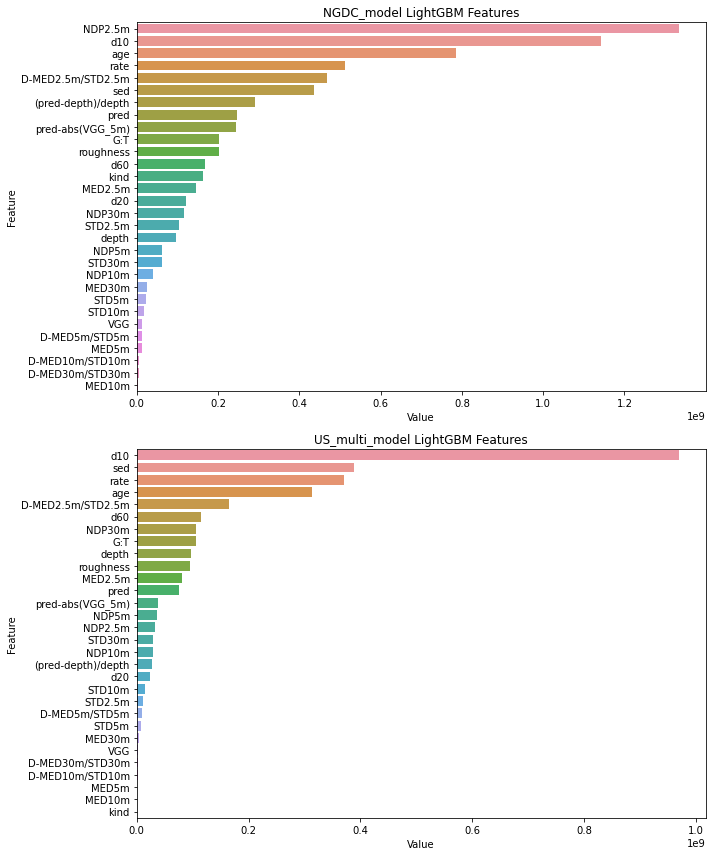

In [15]:
plot_ftr_importance(models,features)

### My hypothesis
Many of the features we're using here are not helping because they are not correlated with good and bad data. We are looking mostly at independent features from independent grids when we *should* be looking at how the multibeam data relate to themselves. For instance abs(pred-depth)/depth should be a useful feature, but it alone might not suggest the ping is bad but rather our predicted depth is bad. It depends on whether a single ping has a large difference (probably bad), or if there is a spatial grouping of pings with that large difference (probably good). Also, echosounder metadata is likely just as relevant, and we can't make use of it...

## Adjusted Boosting parameters

In [6]:
base_path = "/swot2/features/MODEL_RUNS/03_CHANGE_PARAMS/train-test-split"
models = get_models(base_path)

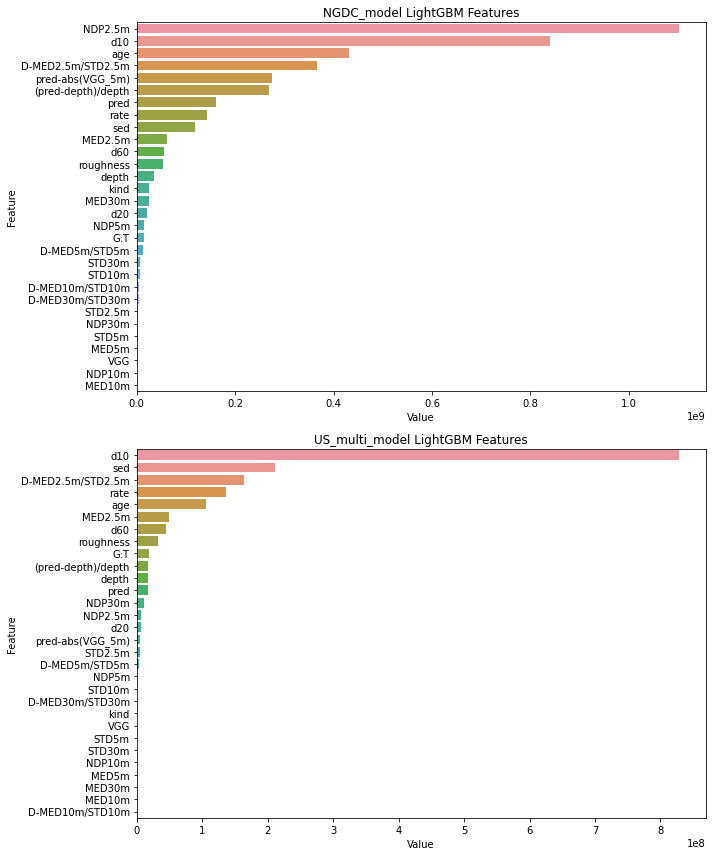

In [3]:
plot_ftr_importance(models,features)

## Remove d10 feature
Potentially a problematic feature

In [11]:
features = remove_feature_from_list(features,['d10'])
base_path = "/swot2/features/MODEL_RUNS/04_NO_d10/train-test-split"
models = get_models(base_path)

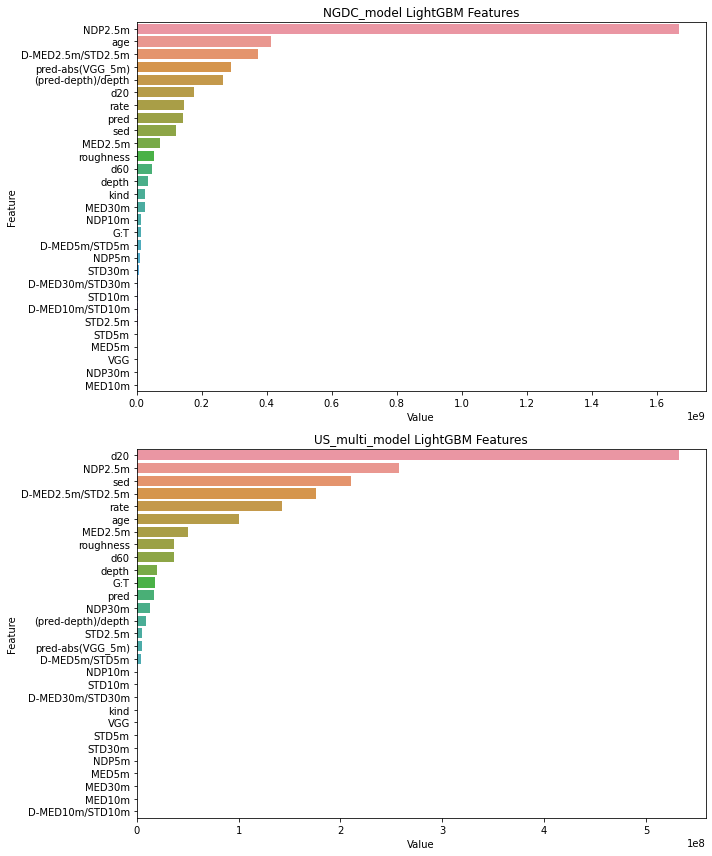

In [4]:
plot_ftr_importance(models,features)

## Remove d20 and NDP2.5

In [13]:
features = remove_feature_from_list(features,['d20','NDP2.5m'])
base_path = "/swot2/features/MODEL_RUNS/05_NO_d20/train-test-split"
models = get_models(base_path)

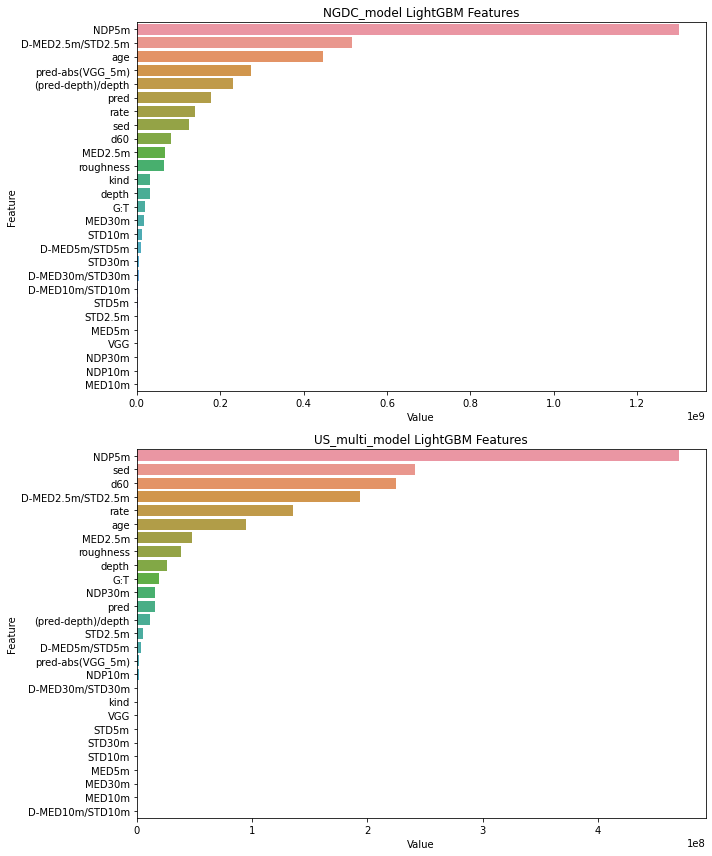

In [4]:
plot_ftr_importance(models,features)